## 자전거 고장 데이터와 대여 이력 데이터를 합친 final_bike.csv 데이터에서 4,5,6월만 필터링

In [1]:
import pandas as pd

# final_bike.csv 파일을 불러옵니다.
df = pd.read_csv('final_bike.csv', encoding='cp949')

# '등록일시' 컬럼을 datetime 형식으로 변환합니다.
df['등록일시'] = pd.to_datetime(df['등록일시'])

# '등록일시'의 월을 기준으로 4, 5, 6월의 데이터만 필터링합니다.
df_filtered = df[df['등록일시'].dt.month.isin([4, 5, 6])]

# 필터링된 데이터를 새로운 CSV 파일로 저장합니다.
df_filtered.to_csv('final_bike_filtered.csv', index=False)


In [1]:
import pandas as pd

# 데이터 로드
df = pd.read_csv('data/final_bike_filtered.xls')

# '등록일시'를 datetime 형식으로 변환
df['등록일시'] = pd.to_datetime(df['등록일시'])

# 자전거 번호별로 정렬
df = df.sort_values(by=['자전거번호', '등록일시'])

## 자전거별 총 사용 횟수, 주행 거리, 이용 시간 누적 계산

In [2]:
# 자전거별 총 사용 횟수, 주행 거리, 이용 시간 누적 계산
df['총_사용_횟수'] = df.groupby('자전거번호').cumcount() + 1
df['누적_이용거리'] = df.groupby('자전거번호')['이용거리(M)'].cumsum()
df['누적_이용시간'] = df.groupby('자전거번호')['이용시간(분)'].cumsum()

In [5]:
df.head(10)

,Unnamed: 0,자전거번호,대여일시,대여 대여소번호,반납일시,반납대여소번호,이용시간(분),이용거리(M),등록일시,구분,총_사용_횟수,누적_이용거리,누적_이용시간
901630,611886,SPB-30010,2024-05-04 10:51:13,4678,2024-05-04 11:09:13,04678,18,1299.21,2024-05-10 11:52:02,단말기,1,1299.21,18
911171,617991,SPB-30010,2024-05-04 11:55:17,4678,2024-05-04 11:58:51,04674,3,374.84,2024-05-10 11:52:02,단말기,2,1674.05,21
935294,633891,SPB-30010,2024-05-04 13:42:34,4674,2024-05-04 13:51:15,00985,8,637.59,2024-05-10 11:52:02,단말기,3,2311.64,29
939513,636616,SPB-30010,2024-05-04 14:01:10,985,2024-05-04 14:09:49,00931,8,1446.24,2024-05-10 11:52:02,단말기,4,3757.88,37
946667,641368,SPB-30010,2024-05-04 14:30:52,931,2024-05-04 14:42:46,00932,11,978.71,2024-05-10 11:52:02,단말기,5,4736.59,48
958332,648935,SPB-30010,2024-05-04 15:25:33,932,2024-05-04 15:33:23,00906,7,826.10,2024-05-10 11:52:02,단말기,6,5562.69,55
1087313,736347,SPB-30010,2024-05-04 23:57:47,906,2024-05-05 00:01:14,00908,3,475.44,2024-05-10 11:52:02,단말기,7,6038.13,58
1091856,739569,SPB-30010,2024-05-05 00:23:26,908,2024-05-05 00:27:25,00906,3,475.57,2024-05-10 11:52:02,단말기,8,6513.70,61
1109054,751243,SPB-30010,2024-05-05 12:59:00,906,2024-05-05 13:02:21,00908,3,364.51,2024-05-10 11:52:02,단말기,9,6878.21,64
1118184,757016,SPB-30010,2024-05-06 10:58:52,908,2024-05-06 11:27:33,00933,28,2122.82,2024-05-10 11:52:02,단말기,10,9001.03,92


In [7]:
df_단말기 = df[df['구분'] == '단말기']

In [8]:
df_단말기.head()

,Unnamed: 0,자전거번호,대여일시,대여 대여소번호,반납일시,반납대여소번호,이용시간(분),이용거리(M),등록일시,구분,...,단말기_고장_간격,안장_이전_고장_횟수,안장_고장_간격,체인_이전_고장_횟수,체인_고장_간격,타이어_이전_고장_횟수,타이어_고장_간격,페달_이전_고장_횟수,페달_고장_간격,기타_이전_고장_횟수
901630,611886,SPB-30010,2024-05-04 10:51:13,4678,2024-05-04 11:09:13,04678,18,1299.21,2024-05-10 11:52:02,단말기,...,0,0,0,0,0,0,0,0,0,0
911171,617991,SPB-30010,2024-05-04 11:55:17,4678,2024-05-04 11:58:51,04674,3,374.84,2024-05-10 11:52:02,단말기,...,0,0,0,0,0,0,0,0,0,0
935294,633891,SPB-30010,2024-05-04 13:42:34,4674,2024-05-04 13:51:15,00985,8,637.59,2024-05-10 11:52:02,단말기,...,0,0,0,0,0,0,0,0,0,0
939513,636616,SPB-30010,2024-05-04 14:01:10,985,2024-05-04 14:09:49,00931,8,1446.24,2024-05-10 11:52:02,단말기,...,0,0,0,0,0,0,0,0,0,0
946667,641368,SPB-30010,2024-05-04 14:30:52,931,2024-05-04 14:42:46,00932,11,978.71,2024-05-10 11:52:02,단말기,...,0,0,0,0,0,0,0,0,0,0


In [22]:
import pandas as pd

# 예제 데이터프레임을 로드하거나 생성합니다.
# df = pd.read_csv("final_bike.csv")  # 실제 데이터 파일 로드

# '구분' 컬럼에 있는 고장 부위 목록을 확인합니다.
unique_parts = df['구분'].unique()
print("고장 부위 목록:", unique_parts)


고장 부위 목록: ['단말기' '타이어 ' '안장' '기타 ' '체인' '페달']


## 부위별 고장 간격, 이전 고장 횟수 컬럼 계산 후 추가

In [3]:
# 부위별 고장 기록이 True인 경우 고장 횟수 누적 계산

# '구분' 컬럼의 부위명에서 공백 제거
df['구분'] = df['구분'].str.strip()

# 고장 부위 목록
parts = ['단말기', '안장', '체인', '타이어', '페달', '기타']

# 부위별로 누적 고장 횟수 및 고장 간격 계산
for part in parts:
    # 부위별로 고장 기록이 True인 경우 고장 횟수 누적 계산
    df[f'{part}_이전_고장_횟수'] = df.groupby('자전거번호').apply(
        lambda x: (x['구분'] == part).cumsum()
    ).reset_index(level=0, drop=True)
    
    # 고장 간격 계산 (고장이 발생한 경우 0으로 리셋)
    df[f'{part}_고장_간격'] = df.groupby('자전거번호').apply(
        lambda x: x['등록일시'].diff().fillna(pd.Timedelta(seconds=0)).dt.days
    ).reset_index(level=0, drop=True)

# 결과 확인
print(df.tail())

          Unnamed: 0      자전거번호                 대여일시  대여 대여소번호  \
28852956    19373317  SPB-84996  2024-02-20 12:06:03      3570   
28989308    19457399  SPB-84996  2024-02-23 10:06:19      3520   
29009891    19470220  SPB-84996  2024-02-23 14:09:24      3501   
29010084    19470335  SPB-84996  2024-02-23 14:17:13       505   
29021365    19477131  SPB-84996  2024-02-23 15:47:51       505   

                         반납일시 반납대여소번호  이용시간(분)  이용거리(M)                등록일시  \
28852956  2024-02-20 12:11:29   03520        5   1050.0 2024-05-15 12:31:05   
28989308  2024-02-23 10:09:12   03501        2    390.0 2024-05-15 12:31:05   
29009891  2024-02-23 14:16:26   00505        7    520.0 2024-05-15 12:31:05   
29010084  2024-02-23 14:18:20   00505        1     40.0 2024-05-15 12:31:05   
29021365  2024-02-23 15:57:36   00501        9   1570.0 2024-05-15 12:31:05   

           구분  ...  안장_이전_고장_횟수  안장_고장_간격  체인_이전_고장_횟수  체인_고장_간격  \
28852956  타이어  ...            0         0            0      

In [31]:
df.columns

Index(['Unnamed: 0', '자전거번호', '대여일시', '대여 대여소번호', '반납일시', '반납대여소번호', '이용시간(분)',
       '이용거리(M)', '등록일시', '구분', '총_사용_횟수', '누적_이용거리', '누적_이용시간',
       '단말기_이전_고장_횟수', '단말기_고장_간격', '안장_이전_고장_횟수', '안장_고장_간격', '체인_이전_고장_횟수',
       '체인_고장_간격', '타이어_이전_고장_횟수', '타이어_고장_간격', '페달_이전_고장_횟수', '페달_고장_간격',
       '기타_이전_고장_횟수', '기타_고장_간격'],
      dtype='object')

## 현재 부위가 고장났는지 , 다음 사용에서 고장 발생 여부를 나타내는 컬럼 추가

In [4]:
# '구분' 컬럼의 부위명에서 공백 제거
df['구분'] = df['구분'].str.strip()

# 고장 부위 목록
parts = ['기타', '단말기', '안장', '체인', '타이어', '페달']

# 각 부위별로 목표 변수 생성: 다음 사용에서 고장이 발생하는지 여부
for part in parts:
    # 현재 부위가 고장났는지를 나타내는 열 생성
    df[f'{part}_고장'] = df['구분'] == part

    # 다음 사용에서 고장이 발생하는지 여부를 나타내는 열 생성
    df[f'{part}_다음_고장'] = df.groupby('자전거번호')[f'{part}_고장'].shift(-1).fillna(False)

# 결과 확인
print(df.head())

        Unnamed: 0      자전거번호                 대여일시  대여 대여소번호  \
901630      611886  SPB-30010  2024-05-04 10:51:13      4678   
911171      617991  SPB-30010  2024-05-04 11:55:17      4678   
935294      633891  SPB-30010  2024-05-04 13:42:34      4674   
939513      636616  SPB-30010  2024-05-04 14:01:10       985   
946667      641368  SPB-30010  2024-05-04 14:30:52       931   

                       반납일시 반납대여소번호  이용시간(분)  이용거리(M)                등록일시  \
901630  2024-05-04 11:09:13   04678       18  1299.21 2024-05-10 11:52:02   
911171  2024-05-04 11:58:51   04674        3   374.84 2024-05-10 11:52:02   
935294  2024-05-04 13:51:15   00985        8   637.59 2024-05-10 11:52:02   
939513  2024-05-04 14:09:49   00931        8  1446.24 2024-05-10 11:52:02   
946667  2024-05-04 14:42:46   00932       11   978.71 2024-05-10 11:52:02   

         구분  ...  단말기_고장  단말기_다음_고장  안장_고장  안장_다음_고장  체인_고장  체인_다음_고장  타이어_고장  \
901630  단말기  ...    True       True  False     False  False     False  

In [6]:
df.columns

Index(['Unnamed: 0', '자전거번호', '대여일시', '대여 대여소번호', '반납일시', '반납대여소번호', '이용시간(분)',
       '이용거리(M)', '등록일시', '구분', '총_사용_횟수', '누적_이용거리', '누적_이용시간',
       '단말기_이전_고장_횟수', '단말기_고장_간격', '안장_이전_고장_횟수', '안장_고장_간격', '체인_이전_고장_횟수',
       '체인_고장_간격', '타이어_이전_고장_횟수', '타이어_고장_간격', '페달_이전_고장_횟수', '페달_고장_간격',
       '기타_이전_고장_횟수', '기타_고장_간격', '기타_고장', '기타_다음_고장', '단말기_고장', '단말기_다음_고장',
       '안장_고장', '안장_다음_고장', '체인_고장', '체인_다음_고장', '타이어_고장', '타이어_다음_고장',
       '페달_고장', '페달_다음_고장'],
      dtype='object')

## 다음 이용시 '단말기' 고장 여부 예측

Accuracy: 0.9845
F1 Score: 0.7848
Precision: 0.8220
Recall: 0.7508
Confusion Matrix:
[[5725665   36690]
 [  56230  169419]]


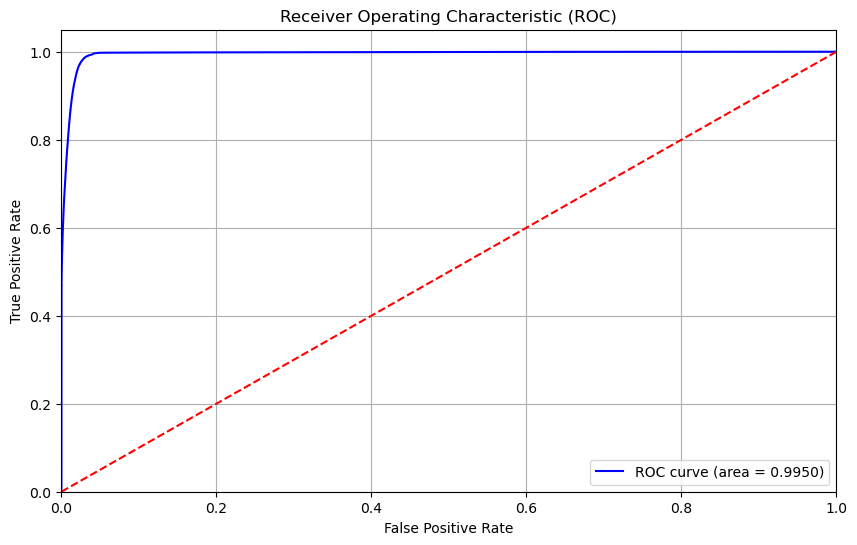

ROC AUC: 0.9950


In [37]:
import xgboost as xgb
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, f1_score, precision_score, recall_score, confusion_matrix
import matplotlib.pyplot as plt
from sklearn.metrics import roc_curve, roc_auc_score

# 특성과 목표 변수 선택 (단말기 고장 예측)
features = ['총_사용_횟수', '누적_이용거리', '누적_이용시간', '단말기_이전_고장_횟수', '단말기_고장_간격']
target = '단말기_다음_고장'

# 학습 및 테스트 데이터 분리
X = df[features]
y = df[target]

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# XGBoost 모델 학습
model = xgb.XGBClassifier(eval_metric='logloss')  # 'use_label_encoder'는 제거
model.fit(X_train, y_train)

# 예측 및 평가
y_pred = model.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)
precision = precision_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)
conf_matrix = confusion_matrix(y_test, y_pred)

# ROC 곡선 및 AUC
y_prob = model.predict_proba(X_test)[:, 1]
fpr, tpr, thresholds = roc_curve(y_test, y_prob)
roc_auc = roc_auc_score(y_test, y_prob)

# 결과 출력
print(f'Accuracy: {accuracy:.4f}')
print(f'F1 Score: {f1:.4f}')
print(f'Precision: {precision:.4f}')
print(f'Recall: {recall:.4f}')
print('Confusion Matrix:')
print(conf_matrix)

# ROC 곡선 시각화
plt.figure(figsize=(10, 6))
plt.plot(fpr, tpr, color='blue', label=f'ROC curve (area = {roc_auc:.4f})')
plt.plot([0, 1], [0, 1], color='red', linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC)')
plt.legend(loc='lower right')
plt.grid()
plt.show()

# ROC AUC 출력
print(f'ROC AUC: {roc_auc:.4f}')


## 다음 이용시 '안장' 고장 여부 예측

Accuracy: 0.9544
F1 Score: 0.8326
Precision: 0.8661
Recall: 0.8017
Confusion Matrix:
[[5036717  104933]
 [ 167821  678533]]


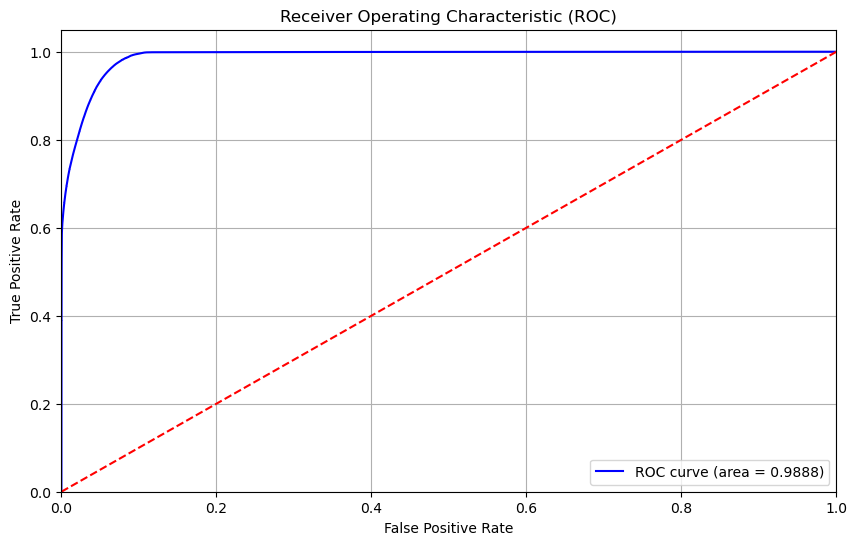

ROC AUC: 0.9888


In [36]:
import xgboost as xgb
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, f1_score, precision_score, recall_score, confusion_matrix
import matplotlib.pyplot as plt
from sklearn.metrics import roc_curve, roc_auc_score

# 특성과 목표 변수 선택 (안장 고장 예측)
features = ['총_사용_횟수', '누적_이용거리', '누적_이용시간', '안장_이전_고장_횟수', '안장_고장_간격']
target = '안장_다음_고장'

# 학습 및 테스트 데이터 분리
X = df[features]
y = df[target]

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# XGBoost 모델 학습
model = xgb.XGBClassifier(eval_metric='logloss')  # 'use_label_encoder'는 제거
model.fit(X_train, y_train)

# 예측 및 평가
y_pred = model.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)
precision = precision_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)
conf_matrix = confusion_matrix(y_test, y_pred)

# ROC 곡선 및 AUC
y_prob = model.predict_proba(X_test)[:, 1]
fpr, tpr, thresholds = roc_curve(y_test, y_prob)
roc_auc = roc_auc_score(y_test, y_prob)

# 결과 출력
print(f'Accuracy: {accuracy:.4f}')
print(f'F1 Score: {f1:.4f}')
print(f'Precision: {precision:.4f}')
print(f'Recall: {recall:.4f}')
print('Confusion Matrix:')
print(conf_matrix)

# ROC 곡선 시각화
plt.figure(figsize=(10, 6))
plt.plot(fpr, tpr, color='blue', label=f'ROC curve (area = {roc_auc:.4f})')
plt.plot([0, 1], [0, 1], color='red', linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC)')
plt.legend(loc='lower right')
plt.grid()
plt.show()

# ROC AUC 출력
print(f'ROC AUC: {roc_auc:.4f}')


## 다음 이용시 '페달' 고장 여부 예측

Accuracy: 0.9290
F1 Score: 0.6059
Precision: 0.7484
Recall: 0.5089
Confusion Matrix:
[[5236516  109777]
 [ 315124  326587]]


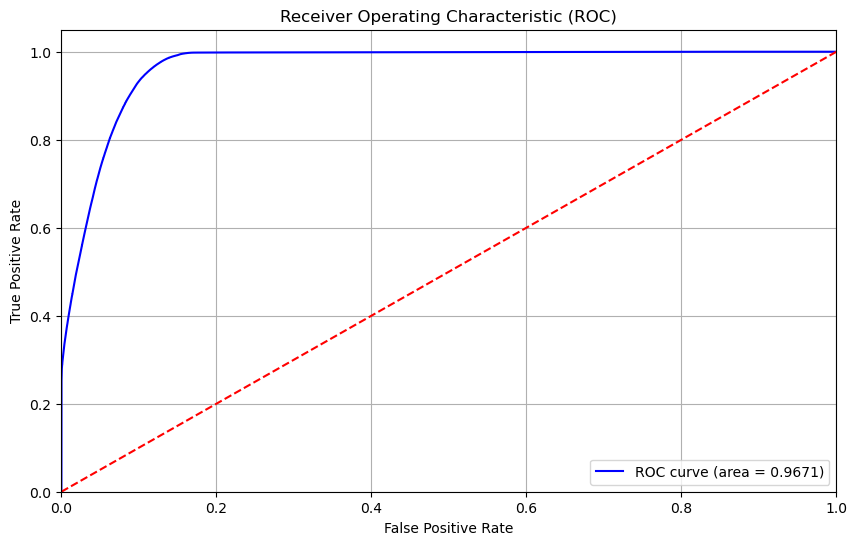

ROC AUC: 0.9671


In [38]:
import xgboost as xgb
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, f1_score, precision_score, recall_score, confusion_matrix
import matplotlib.pyplot as plt
from sklearn.metrics import roc_curve, roc_auc_score

# 특성과 목표 변수 선택 (페달 고장 예측)
features = ['총_사용_횟수', '누적_이용거리', '누적_이용시간', '페달_이전_고장_횟수', '페달_고장_간격']
target = '페달_다음_고장'

# 학습 및 테스트 데이터 분리
X = df[features]
y = df[target]

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# XGBoost 모델 학습
model = xgb.XGBClassifier(eval_metric='logloss')  # 'use_label_encoder'는 제거
model.fit(X_train, y_train)

# 예측 및 평가
y_pred = model.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)
precision = precision_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)
conf_matrix = confusion_matrix(y_test, y_pred)

# ROC 곡선 및 AUC
y_prob = model.predict_proba(X_test)[:, 1]
fpr, tpr, thresholds = roc_curve(y_test, y_prob)
roc_auc = roc_auc_score(y_test, y_prob)

# 결과 출력
print(f'Accuracy: {accuracy:.4f}')
print(f'F1 Score: {f1:.4f}')
print(f'Precision: {precision:.4f}')
print(f'Recall: {recall:.4f}')
print('Confusion Matrix:')
print(conf_matrix)

# ROC 곡선 시각화
plt.figure(figsize=(10, 6))
plt.plot(fpr, tpr, color='blue', label=f'ROC curve (area = {roc_auc:.4f})')
plt.plot([0, 1], [0, 1], color='red', linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC)')
plt.legend(loc='lower right')
plt.grid()
plt.show()

# ROC AUC 출력
print(f'ROC AUC: {roc_auc:.4f}')


## 다음 이용시 '타이어' 고장 여부 예측

Accuracy: 0.9523
F1 Score: 0.8235
Precision: 0.8407
Recall: 0.8070
Confusion Matrix:
[[5035224  126377]
 [ 159531  666872]]


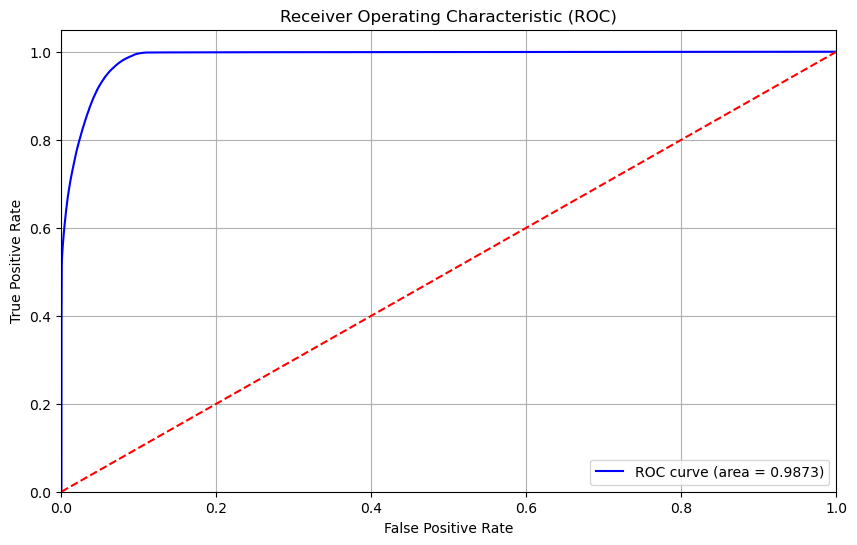

ROC AUC: 0.9873


In [39]:
import xgboost as xgb
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, f1_score, precision_score, recall_score, confusion_matrix
import matplotlib.pyplot as plt
from sklearn.metrics import roc_curve, roc_auc_score

# 특성과 목표 변수 선택 (타이어 고장 예측)
features = ['총_사용_횟수', '누적_이용거리', '누적_이용시간', '타이어_이전_고장_횟수', '타이어_고장_간격']
target = '타이어_다음_고장'

# 학습 및 테스트 데이터 분리
X = df[features]
y = df[target]

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# XGBoost 모델 학습
model = xgb.XGBClassifier(eval_metric='logloss')  # 'use_label_encoder'는 제거
model.fit(X_train, y_train)

# 예측 및 평가
y_pred = model.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)
precision = precision_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)
conf_matrix = confusion_matrix(y_test, y_pred)

# ROC 곡선 및 AUC
y_prob = model.predict_proba(X_test)[:, 1]
fpr, tpr, thresholds = roc_curve(y_test, y_prob)
roc_auc = roc_auc_score(y_test, y_prob)

# 결과 출력
print(f'Accuracy: {accuracy:.4f}')
print(f'F1 Score: {f1:.4f}')
print(f'Precision: {precision:.4f}')
print(f'Recall: {recall:.4f}')
print('Confusion Matrix:')
print(conf_matrix)

# ROC 곡선 시각화
plt.figure(figsize=(10, 6))
plt.plot(fpr, tpr, color='blue', label=f'ROC curve (area = {roc_auc:.4f})')
plt.plot([0, 1], [0, 1], color='red', linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC)')
plt.legend(loc='lower right')
plt.grid()
plt.show()

# ROC AUC 출력
print(f'ROC AUC: {roc_auc:.4f}')


## 다음 이용시 '체인' 고장 여부 예측

Accuracy: 0.8822
F1 Score: 0.8089
Precision: 0.8275
Recall: 0.7911
Confusion Matrix:
[[3789937  311192]
 [ 394099 1492776]]


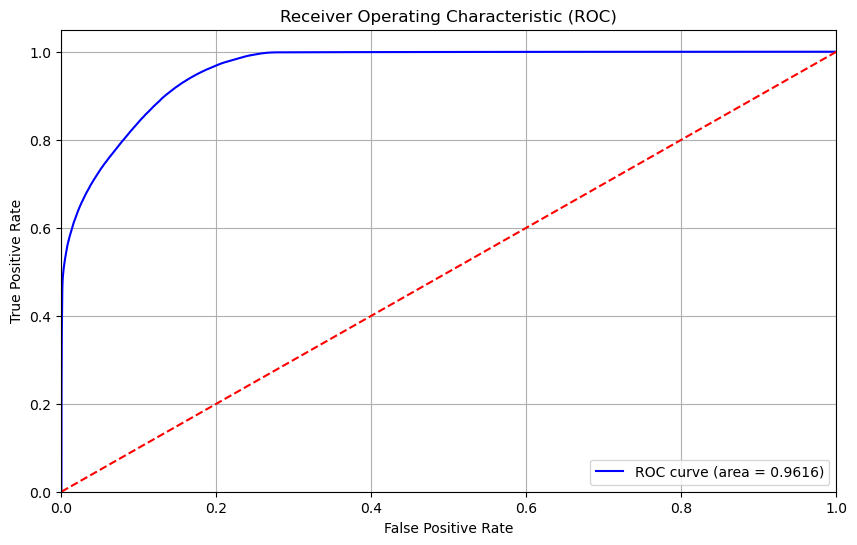

ROC AUC: 0.9616


In [40]:
import xgboost as xgb
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, f1_score, precision_score, recall_score, confusion_matrix
import matplotlib.pyplot as plt
from sklearn.metrics import roc_curve, roc_auc_score

# 특성과 목표 변수 선택 (체인 고장 예측)
features = ['총_사용_횟수', '누적_이용거리', '누적_이용시간', '체인_이전_고장_횟수', '체인_고장_간격']
target = '체인_다음_고장'

# 학습 및 테스트 데이터 분리
X = df[features]
y = df[target]

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# XGBoost 모델 학습
model = xgb.XGBClassifier(eval_metric='logloss')  # 'use_label_encoder'는 제거
model.fit(X_train, y_train)

# 예측 및 평가
y_pred = model.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)
precision = precision_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)
conf_matrix = confusion_matrix(y_test, y_pred)

# ROC 곡선 및 AUC
y_prob = model.predict_proba(X_test)[:, 1]
fpr, tpr, thresholds = roc_curve(y_test, y_prob)
roc_auc = roc_auc_score(y_test, y_prob)

# 결과 출력
print(f'Accuracy: {accuracy:.4f}')
print(f'F1 Score: {f1:.4f}')
print(f'Precision: {precision:.4f}')
print(f'Recall: {recall:.4f}')
print('Confusion Matrix:')
print(conf_matrix)

# ROC 곡선 시각화
plt.figure(figsize=(10, 6))
plt.plot(fpr, tpr, color='blue', label=f'ROC curve (area = {roc_auc:.4f})')
plt.plot([0, 1], [0, 1], color='red', linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC)')
plt.legend(loc='lower right')
plt.grid()
plt.show()

# ROC AUC 출력
print(f'ROC AUC: {roc_auc:.4f}')


## 다음 이용시 '기타' 고장 여부 예측

Accuracy: 0.9156
F1 Score: 0.8301
Precision: 0.8703
Recall: 0.7934
Confusion Matrix:
[[4247642  184059]
 [ 321478 1234825]]


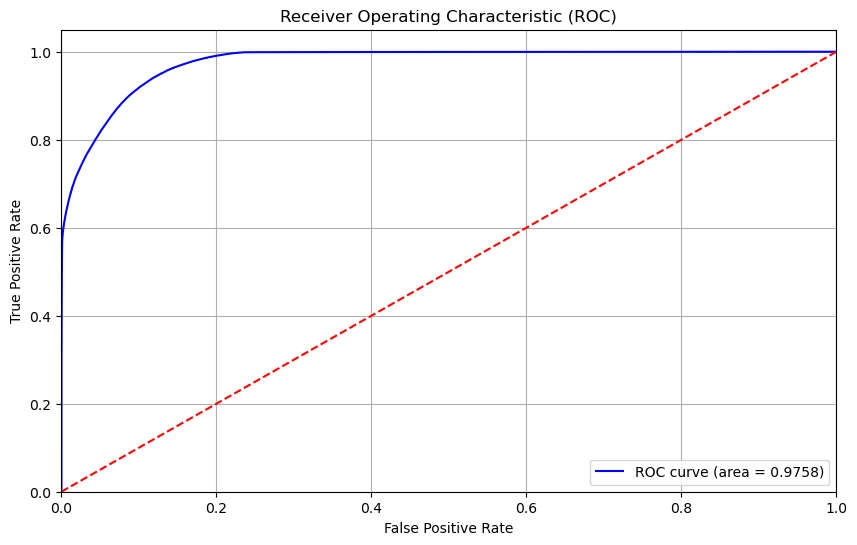

ROC AUC: 0.9758


In [42]:
import xgboost as xgb
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, f1_score, precision_score, recall_score, confusion_matrix
import matplotlib.pyplot as plt
from sklearn.metrics import roc_curve, roc_auc_score

# 특성과 목표 변수 선택 (기타 고장 예측)
features = ['총_사용_횟수', '누적_이용거리', '누적_이용시간', '기타_이전_고장_횟수', '기타_고장_간격']
target = '기타_다음_고장'

# 학습 및 테스트 데이터 분리
X = df[features]
y = df[target]

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# XGBoost 모델 학습
model = xgb.XGBClassifier(eval_metric='logloss')  # 'use_label_encoder'는 제거
model.fit(X_train, y_train)

# 예측 및 평가
y_pred = model.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)
precision = precision_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)
conf_matrix = confusion_matrix(y_test, y_pred)

# ROC 곡선 및 AUC
y_prob = model.predict_proba(X_test)[:, 1]
fpr, tpr, thresholds = roc_curve(y_test, y_prob)
roc_auc = roc_auc_score(y_test, y_prob)

# 결과 출력
print(f'Accuracy: {accuracy:.4f}')
print(f'F1 Score: {f1:.4f}')
print(f'Precision: {precision:.4f}')
print(f'Recall: {recall:.4f}')
print('Confusion Matrix:')
print(conf_matrix)

# ROC 곡선 시각화
plt.figure(figsize=(10, 6))
plt.plot(fpr, tpr, color='blue', label=f'ROC curve (area = {roc_auc:.4f})')
plt.plot([0, 1], [0, 1], color='red', linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC)')
plt.legend(loc='lower right')
plt.grid()
plt.show()

# ROC AUC 출력
print(f'ROC AUC: {roc_auc:.4f}')
